In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get Data

In [3]:
df = pd.read_csv('C:\\Users\\lic004\\Desktop\\GitHubTesting\\data\\cleanedData.csv')
df.head()

,Date,High,Low,Open,Close,Volume,Company
0,1/3/2006,47.180000,46.150002,46.919998,47.080002,16296700,BAC
1,1/4/2006,47.240002,46.450001,47.000000,46.580002,17757900,BAC
2,1/5/2006,46.830002,46.320000,46.580002,46.639999,14970700,BAC
3,1/6/2006,46.910000,46.349998,46.799999,46.570000,12599800,BAC
4,1/9/2006,46.970001,46.360001,46.720001,46.599998,15619400,BAC


## Standardize the Variables

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()

In [45]:
scaler.fit(df.drop(['Volume', 'Date','Company'] , axis=1))

StandardScaler()

In [46]:
# Transform the features to a scaled version
scaled_features = scaler.transform(df.drop(['Volume', 'Date','Company'] , axis=1))

In [47]:
# Convert the scaled features to a dataframeand check the head of this dataframe to make sure the scaling worked
df_feat = pd.DataFrame(scaled_features, columns = ['High','Low','Open','Close'])
df_feat.head()

,High,Low,Open,Close
0,-0.299708,-0.299103,-0.296048,-0.293582
1,-0.298866,-0.294811,-0.294915,-0.300669
2,-0.304618,-0.296671,-0.300863,-0.299818
3,-0.303496,-0.296242,-0.297747,-0.300810
4,-0.302654,-0.296099,-0.298880,-0.300385


## Train Test Split

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['Volume'], test_size=0.3)

## Using KNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
# Create a KNN model instance with n_neighbours = 1
knn = KNeighborsClassifier(n_neighbors=1)

In [52]:
# Fit this KNN model to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

## Predictions and valuations

In [53]:
pred = knn.predict(X_test)

In [54]:
from sklearn.metrics import classification_report, confusion_matrix

In [55]:
print(confusion_matrix(y_test, pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [56]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

        7600       0.00      0.00      0.00         0
       10900       0.00      0.00      0.00         0
       13900       0.00      0.00      0.00         1
       14400       0.00      0.00      0.00         1
       15100       0.00      0.00      0.00         0
       15200       0.00      0.00      0.00         1
       16700       0.00      0.00      0.00         1
       16900       0.00      0.00      0.00         1
       17600       0.00      0.00      0.00         0
       17900       0.00      0.00      0.00         0
       18600       0.00      0.00      0.00         1
       19100       0.00      0.00      0.00         0
       19300       0.00      0.00      0.00         0
       19400       0.00      0.00      0.00         1
       20700       0.00      0.00      0.00         1
       21100       0.00      0.00      0.00         1
       21600       0.00      0.00      0.00         1
       21700       0.00    

C:\Users\lic004\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lic004\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lic004\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lic004\Anaconda3\lib\site-packages\sklearn\metrics\

C:\Users\lic004\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Volume'>

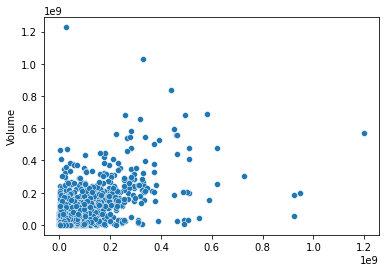

In [59]:
sns.scatterplot(pred, y_test)

## Choosing a K Value

In [60]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

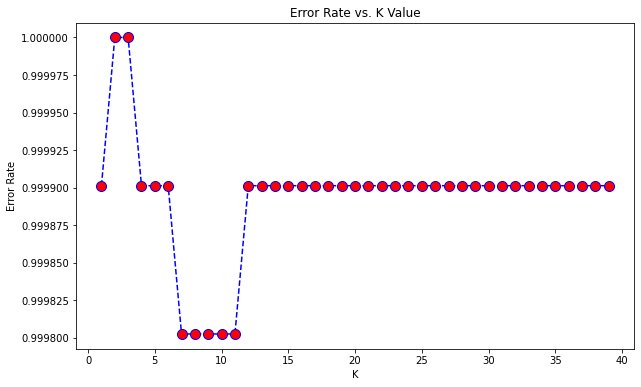

In [61]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Retrain with new K Value

In [63]:
# NOW WITH K=15
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=30')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=30


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


              precision    recall  f1-score   support

        7600       0.00      0.00      0.00         0
        8000       0.00      0.00      0.00         0
        8400       0.00      0.00      0.00         0
       10900       0.00      0.00      0.00         0
       11000       0.00      0.00      0.00         0
       12100       0.00      0.00      0.00         0
       13100       0.00      0.00      0.00         0
       13900       0.00      0.00      0.00         1
       14100       0.00      0.00      0.00         0
       14400       0.00      0.00      0.00         1
       14800       0.00      0.00      0.00         0
       14900       0.00      0.00      0.00         0
       15100       0.00      0.00      0.00         0
       15200       0.00      0.00      0.00         1
       16700       0.00      0.00      0.00         1
 

C:\Users\lic004\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lic004\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lic004\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lic004\Anaconda3\lib\site-packages\sklearn\metrics\

In [69]:
error_rate = []

# Will take some time
for i in range(1,15):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

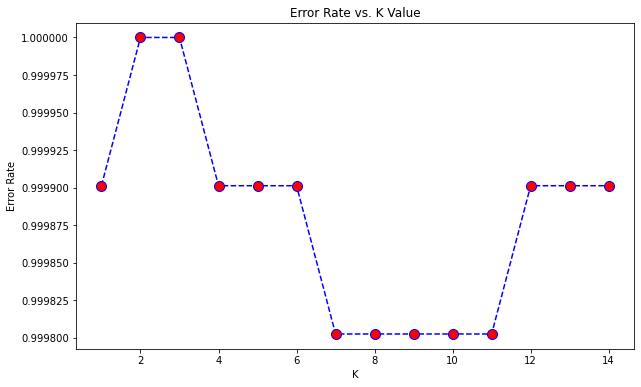

In [70]:
plt.figure(figsize=(10,6))
plt.plot(range(1,15),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')